In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the DataFrame from a file
df = pd.read_csv('data/new_df.csv')

In [3]:
df.head()

,marital status,course,daytime/evening attendance,displaced,debtor,tuition fees up to date,gender,scholarship holder,unemployment rate,gdp,target
0,Single,Animation,Daytime,1,0,1,Male,0,10.8,1.74,Dropout
1,Single,Tourism,Daytime,1,0,0,Male,0,13.9,0.79,Graduate
2,Single,Communication,Daytime,1,0,0,Male,0,10.8,1.74,Dropout
3,Single,Journalism,Daytime,1,0,1,Female,0,9.4,-3.12,Graduate
4,Married,Social Service,Evening,0,0,1,Female,0,13.9,0.79,Graduate


In [4]:
df['target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: target, dtype: int64

In [5]:
df_clean = df[df['target'] != "Enrolled"]

In [19]:
df_clean['displaced'] = df_clean['displaced'].apply(lambda x: "Displaced" if x == 1 else "Not displaced")
df_clean['debtor'] = df_clean['debtor'].apply(lambda x: "Debtor" if x == 1 else "No debt")
df_clean['tuition fees up to date'] = df_clean['tuition fees up to date'].apply(lambda x: "Behind payments" if x == 1 else "Up-to-date payments")
df_clean['scholarship holder'] = df_clean['scholarship holder'].apply(lambda x: "Scholarship" if x == 1 else "No scholarship")

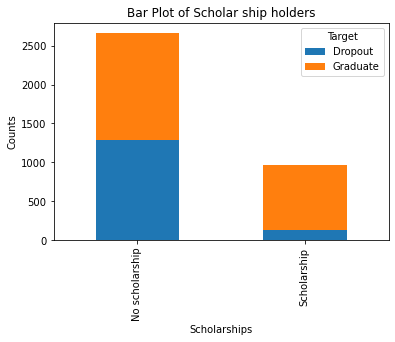

In [26]:
counts = df_clean.groupby(['scholarship holder', 'target']).size().reset_index(name='Counts')
counts = counts.pivot(index='scholarship holder', columns='target', values='Counts')
counts.plot.bar(stacked=True)
plt.xlabel('Scholarships')
plt.ylabel('Counts')
plt.title('Bar Plot of Scholar ship holders')
plt.legend(title='Target')
plt.show()

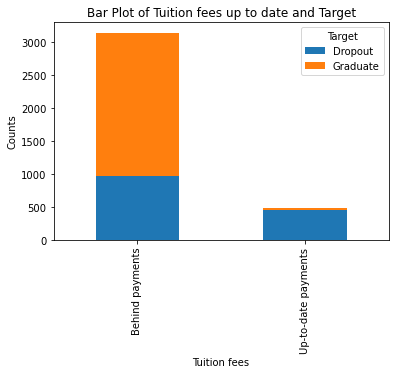

In [25]:
counts = df_clean.groupby(['tuition fees up to date', 'target']).size().reset_index(name='Counts')
counts = counts.pivot(index='tuition fees up to date', columns='target', values='Counts')
counts.plot.bar(stacked=True)
plt.xlabel('Tuition fees')
plt.ylabel('Counts')
plt.title('Bar Plot of Tuition fees up to date and Target')
plt.legend(title='Target')
plt.show()

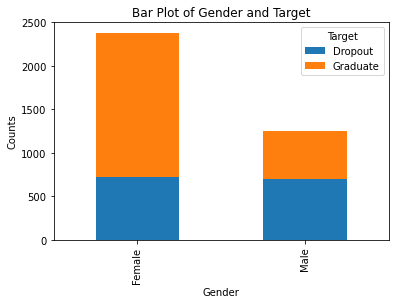

In [12]:
counts = df_clean.groupby(['gender', 'target']).size().reset_index(name='Counts')
counts = counts.pivot(index='gender', columns='target', values='Counts')
counts.plot.bar(stacked=True)
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Bar Plot of Gender and Target')
plt.legend(title='Target')
plt.show()

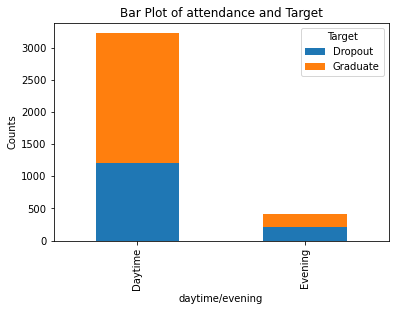

In [22]:
counts = df_clean.groupby(['daytime/evening attendance', 'target']).size().reset_index(name='Counts')
counts = counts.pivot(index='daytime/evening attendance', columns='target', values='Counts')
counts.plot.bar(stacked=True)
plt.xlabel('daytime/evening')
plt.ylabel('Counts')
plt.title('Bar Plot of attendance and Target')
plt.legend(title='Target')
plt.show()

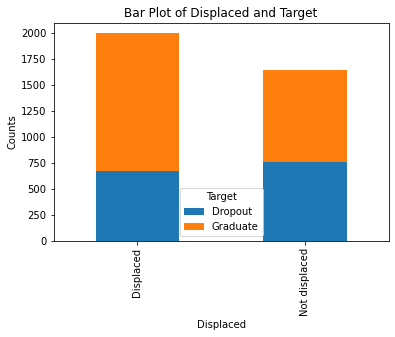

In [20]:
counts = df_clean.groupby(['displaced', 'target']).size().reset_index(name='Counts')
counts = counts.pivot(index='displaced', columns='target', values='Counts')
counts.plot.bar(stacked=True)
plt.xlabel('Displaced')
plt.ylabel('Counts')
plt.title('Bar Plot of Displaced and Target')
plt.legend(title='Target')
plt.show()

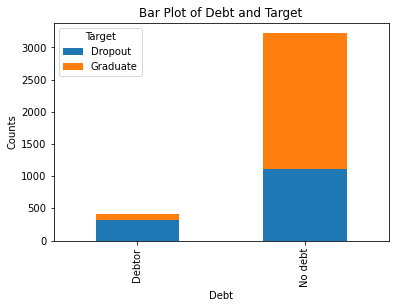

In [24]:
counts = df_clean.groupby(['debtor', 'target']).size().reset_index(name='Counts')
counts = counts.pivot(index='debtor', columns='target', values='Counts')
counts.plot.bar(stacked=True)
plt.xlabel('Debt')
plt.ylabel('Counts')
plt.title('Bar Plot of Debt and Target')
plt.legend(title='Target')
plt.show()

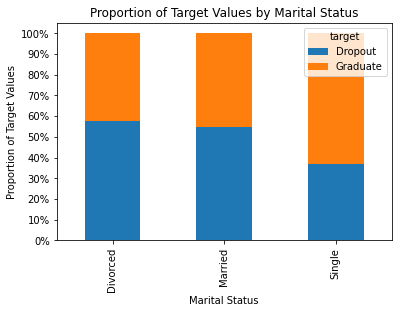

In [36]:
grouped = df_clean.groupby('marital status')['target'].value_counts(normalize=True).unstack()
grouped.plot(kind='bar', stacked=True)
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Target Values')
plt.yticks(np.arange(0, 1.1, 0.1), ['0%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '100%'])
plt.title('Proportion of Target Values by Marital Status')
plt.show()